In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='cp1252')


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2098,ham,"No dice, art class 6 thru 9 :( thanks though. ...",NaN,NaN,NaN
1165,ham,"Haha yeah I see that now, be there in a sec",NaN,NaN,NaN
1764,spam,Hi 07734396839 IBH Customer Loyalty Offer: The...,NaN,NaN,NaN
4339,ham,I want to sent &lt;#&gt; mesages today. Thats...,NaN,NaN,NaN
4701,ham,Anytime...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
4207,ham,Or i go home first lar Ì_ wait 4 me lor.. I pu...
2887,ham,I take it we didn't have the phone callon Frid...
2132,spam,Your B4U voucher w/c 27/03 is MARSMS. Log onto...
4076,ham,Hey sathya till now we dint meet not even a si...
2141,ham,Alright took the morphine. Back in yo.


In [9]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3903,spam,Your 2004 account for 07XXXXXXXXX shows 786 un...
1830,ham,That's the way you should stay oh.
1976,ham,Lol alright i was thinkin that too haha
3767,ham,Where are you call me.
3951,ham,Me hungry buy some food good lei... But mum n ...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check for duplicate values
df.duplicated().sum()

403

In [15]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

## 2.EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

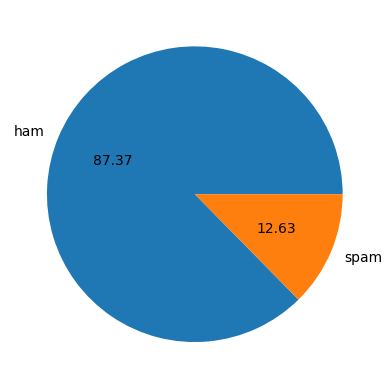

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
# Data is imbalanced

In [22]:
import nltk

In [23]:
!pip install nltk


[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\naras\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_characters'] = df['text'].apply(len)

In [26]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

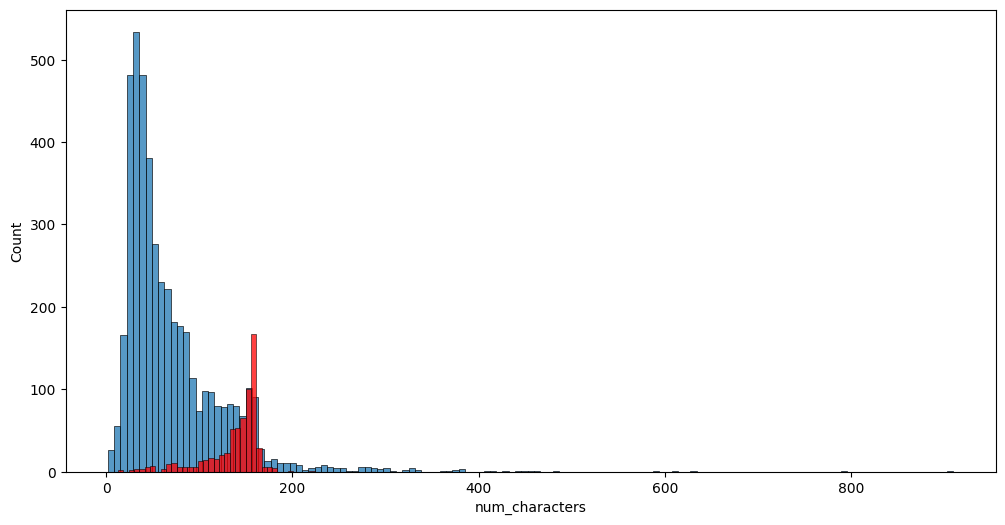

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

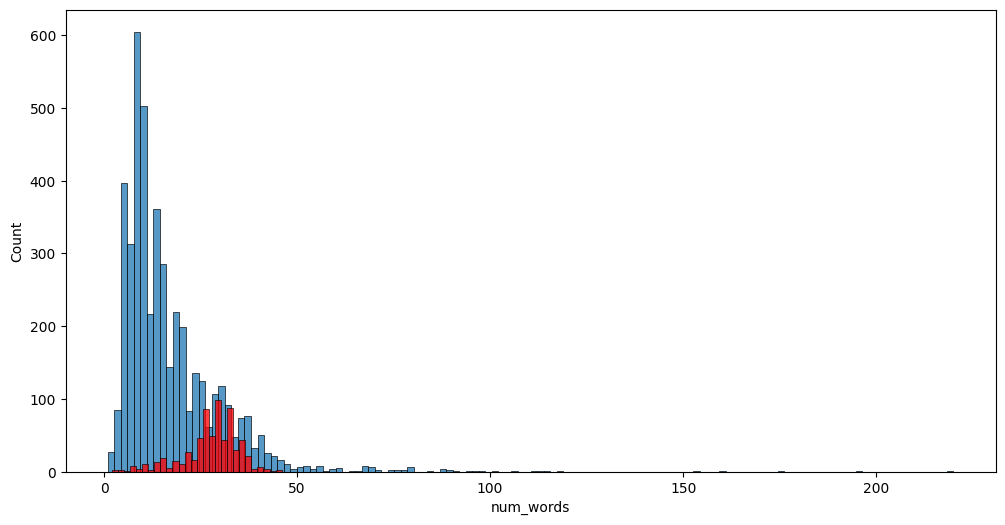

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

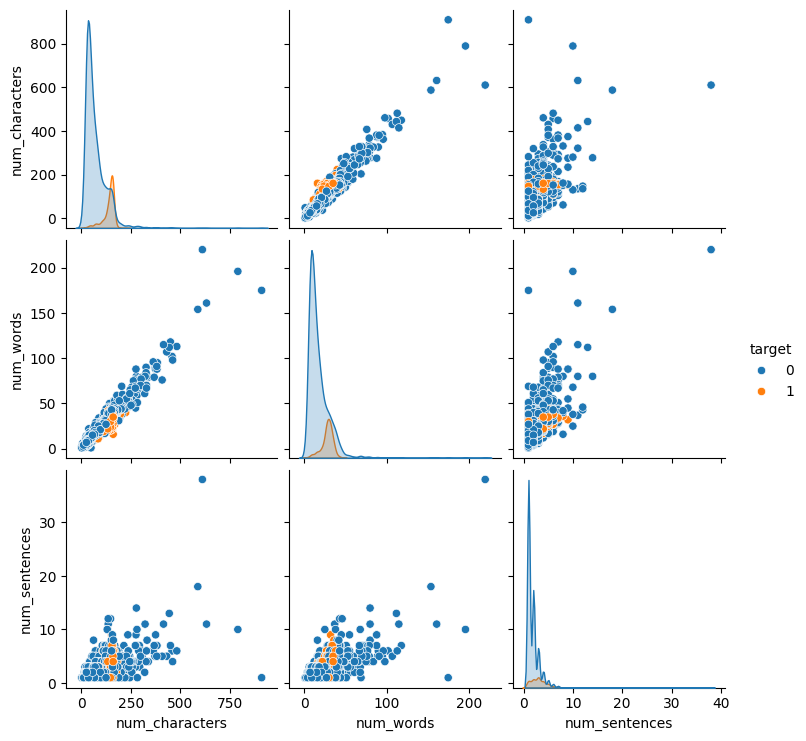

In [37]:
sns.pairplot(df,hue='target')

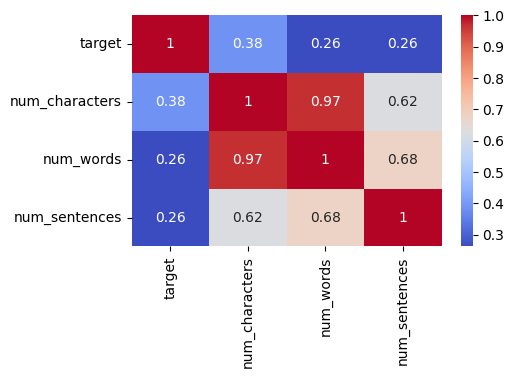

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the text column from the DataFrame
df_numeric = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(5,3))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [40]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [41]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [42]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [43]:
df['transformed_text'] = df['text'].apply(transform_text)

In [44]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [46]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

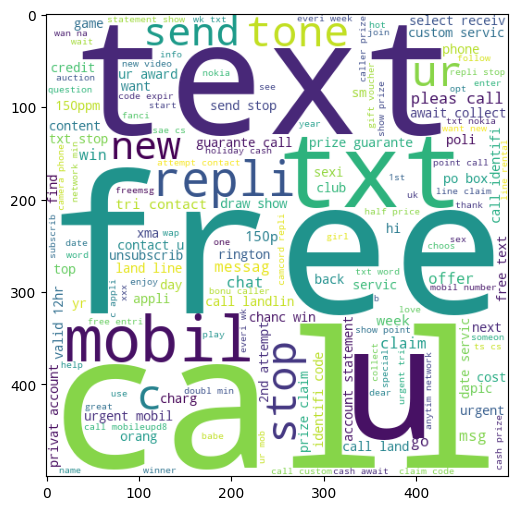

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [48]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

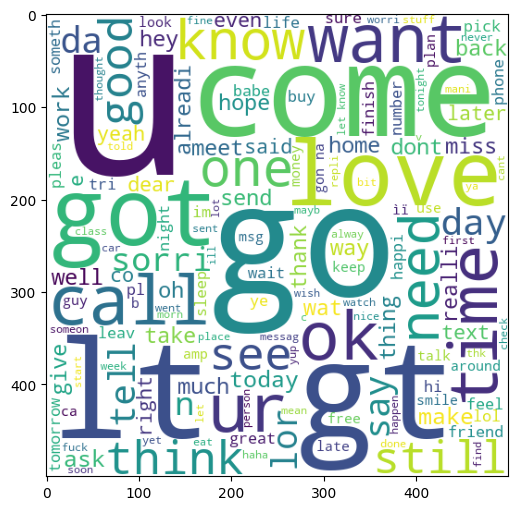

In [49]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [50]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [52]:
len(spam_corpus)

9939

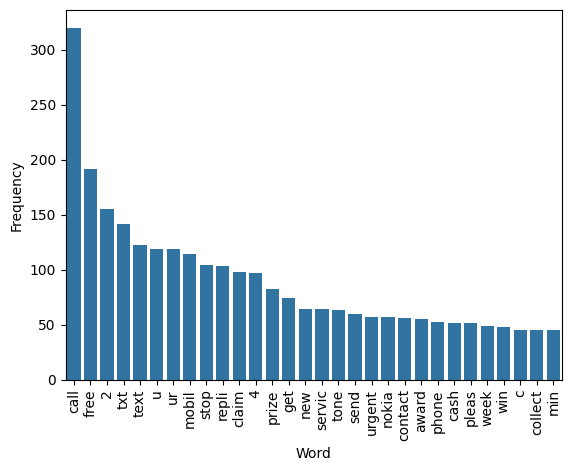

In [53]:
from collections import Counter
# Create a Counter object with the most common 30 words
counter = Counter(spam_corpus).most_common(30)

# Convert the counter data into a DataFrame
d = pd.DataFrame(counter, columns=['Word', 'Frequency'])

# Create the barplot
sns.barplot(x='Word', y='Frequency', data=d)

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

In [54]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [55]:
len(ham_corpus)

35404

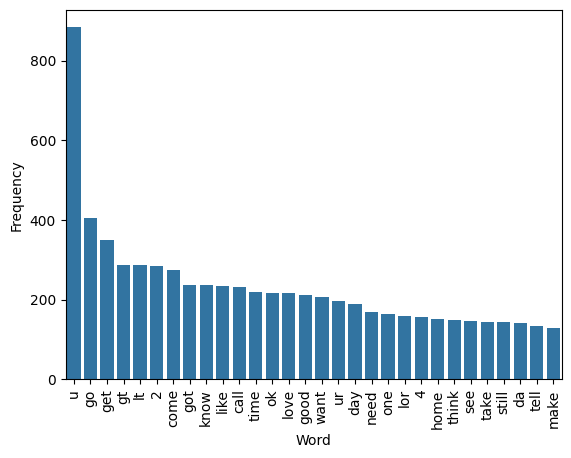

In [56]:
# Create a Counter object with the most common 30 words
counter = Counter(ham_corpus).most_common(30)

# Convert the counter data into a DataFrame
A = pd.DataFrame(counter, columns=['Word', 'Frequency'])

# Create the barplot using keyword arguments
sns.barplot(x='Word', y='Frequency', data=A)

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

In [57]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

In [65]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from xgboost import XGBClassifier
import pickle

In [66]:
# Vectorize the text data
tfidf = TfidfVectorizer(max_features=3000)

In [67]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [68]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [69]:
# Initialize models
mnb = MultinomialNB()
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
final_estimator = RandomForestClassifier()


In [70]:
# Train and evaluate MultinomialNB
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print("MultinomialNB Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("MultinomialNB Precision:", precision_score(y_test, y_pred_mnb))


MultinomialNB Accuracy: 0.9709864603481625
MultinomialNB Precision: 1.0


In [71]:
# Train and evaluate Voting Classifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')
voting.fit(X_train, y_train)
y_pred_voting = voting.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Voting Classifier Precision:", precision_score(y_test, y_pred_voting))



Voting Classifier Accuracy: 0.9816247582205029
Voting Classifier Precision: 0.9917355371900827


In [72]:
# Train and evaluate Stacking Classifier
estimators = [('svm', svc), ('nb', mnb), ('et', etc)]
stacking = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
stacking.fit(X_train, y_train)
y_pred_stacking = stacking.predict(X_test)
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred_stacking))
print("Stacking Classifier Precision:", precision_score(y_test, y_pred_stacking))


Stacking Classifier Accuracy: 0.9806576402321083
Stacking Classifier Precision: 0.946969696969697


In [73]:
# Save the model and vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)
with open('model.pkl', 'wb') as f:
    pickle.dump(mnb, f)


In [74]:

# Load the vectorizer and model
with open('vectorizer.pkl', 'rb') as f:
    loaded_vectorizer = pickle.load(f)
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


In [75]:

# Use the loaded model and vectorizer
X_test_transformed = loaded_vectorizer.transform(df['transformed_text']).toarray()
y_pred_loaded = loaded_model.predict(X_test_transformed)


In [76]:
# Evaluate the loaded model
accuracy_loaded = accuracy_score(df['target'], y_pred_loaded)
precision_loaded = precision_score(df['target'], y_pred_loaded)


In [77]:

print(f"Loaded Model Accuracy: {accuracy_loaded}")
print(f"Loaded Model Precision: {precision_loaded}")


Loaded Model Accuracy: 0.9773650609402206
Loaded Model Precision: 0.9962962962962963
